In [ ]:
!pip install tensorflow==2.4.2

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install import-ipynb
import import_ipynb

In [ ]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [ ]:
from Classes.DataManager import DataManager
from Classes.Transformer import projTransformer
from tensorflow import keras
import tensorflow as tf
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/Transformer.ipynb
Populating the interactive namespace from numpy and matplotlib
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


data loading takes at most 30s, we can improve it saving the numerical representation of sequences

In [ ]:
print("> Loading DataManager...")
dm = DataManager(transformer=True, remove_indicted=True)

print("> Loading train data...")
X_trainhalflife, X_trainpromoter, y_train, geneName_train = dm.get_train(True, True)

print("> Loading validation data...")
X_validationhalflife, X_validationpromoter, y_validation, geneName_validation, _ = dm.get_validation(True, True)

print("> Loading test data...")
X_testhalflife, X_testpromoter, y_test, geneName_test = dm.get_test(True, True)

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



Preprocessing-> Padding

In [ ]:
leftpos  = 9_500          #3_000 
rightpos = 20_000         #13_500
maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [ ]:
X_trainpromoter_p      = keras.preprocessing.sequence.pad_sequences(X_trainpromoter,      maxlen=maxlen)
X_validationpromoter_p = keras.preprocessing.sequence.pad_sequences(X_validationpromoter, maxlen=maxlen)
X_testpromoter_p       = keras.preprocessing.sequence.pad_sequences(X_testpromoter,       maxlen=maxlen)

INFO:tensorflow:Initializing the TPU system: grpc://10.64.121.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.64.121.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500)]      0                                            
__________________________________________________________________________________________________
token_and_position_embedding (T (None, 10500, 32)    336128      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10500, 32)    6176        token_and_position_embedding[0][0
__________________________________________________________________________________________________
average_pooling1d (AveragePooli (None, 350, 32)      0           conv1d[0][0]                     
__________________________________________________________________________________

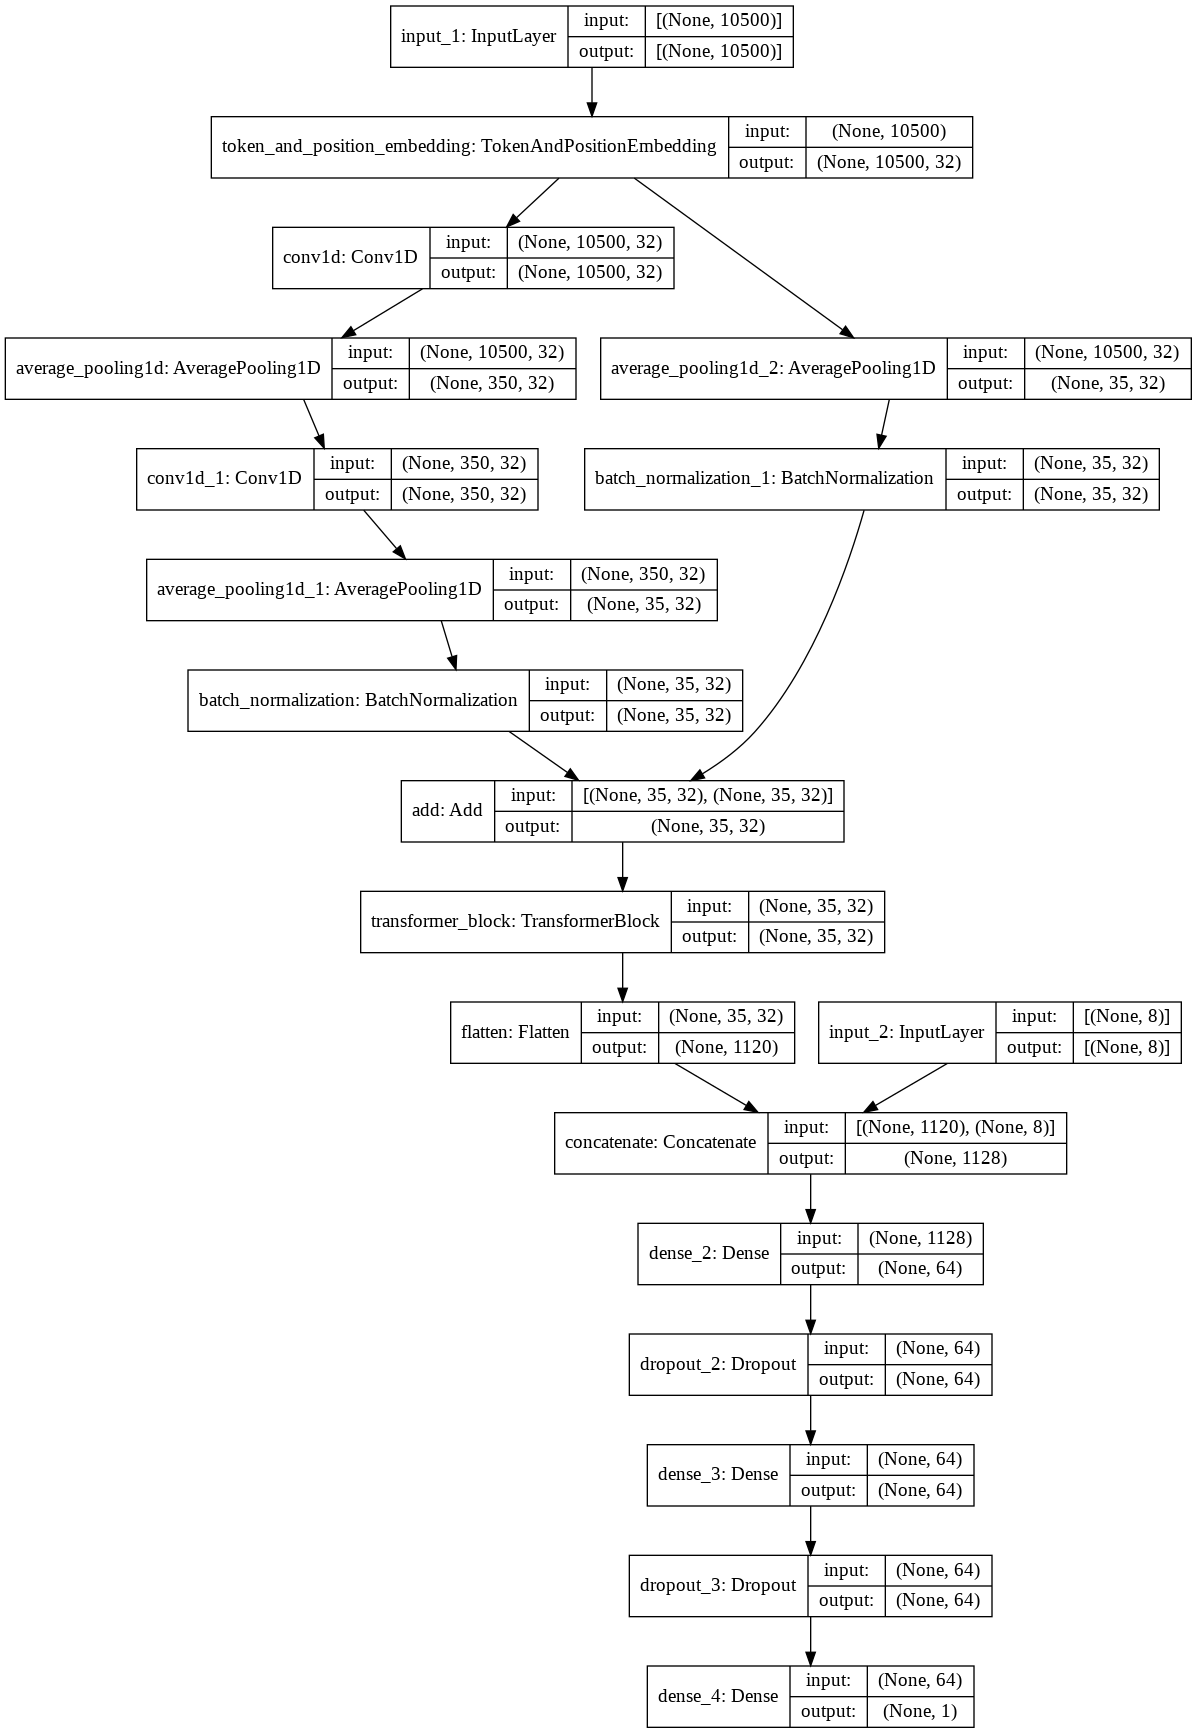


Parameters:
{'checkpoint_dir': 'embeddingweighted/', 'model_type': 'best', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.001, 'momentum': 0.9, 'maxlen': 10500, 'embed_dim': 32, 'num_heads': 1, 'ff_dim': 64, 'vocab_size': 4, 'dense': 64, 'dropout_rate': 0.1, 'lr_reduction_epoch': 60, 't_rate': 0.1, 'patience': 20, 'optimizer': 'SGD', 'warmup_steps': 8000, 'shuffle': True, 'logdir': None, 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f5dbf7edfd0>}



In [ ]:
# # Clear any logs from previous runs
# !rm -rf ./logs/transformer_best_0-001/

model_type="best"
logdir = None
loss = "mse"

######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projTransformer(checkpoint_dir="embeddingweighted/", model_type=model_type, n_epochs=300, batch_size=256, 
                      learning_rate=1e-3, patience=20, optimizer="SGD", vocab_size=4,
                      lr_reduction_epoch=60, maxlen=maxlen, embed_dim=32, num_heads=1, ff_dim=64, dense=64, 
                      dropout_rate=0.1, logdir=logdir, t_rate=0.1, momentum=0.9, loss=loss)
    
########################################################################################################################

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 47s 459ms/step - loss: 1.0870 - val_loss: 1.2065
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 3s 49ms/step - loss: 0.7187 - val_loss: 1.3761
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 3s 49ms/step - loss: 0.6753 - val_loss: 1.3984
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 3s 48ms/step - loss: 0.6572 - val_loss: 1.2945
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 3s 48ms/step - loss: 0.6450 - val_loss: 1.0498
Epoch 6/300

Epoch 00006: LearningRateScheduler reducing learning rate to

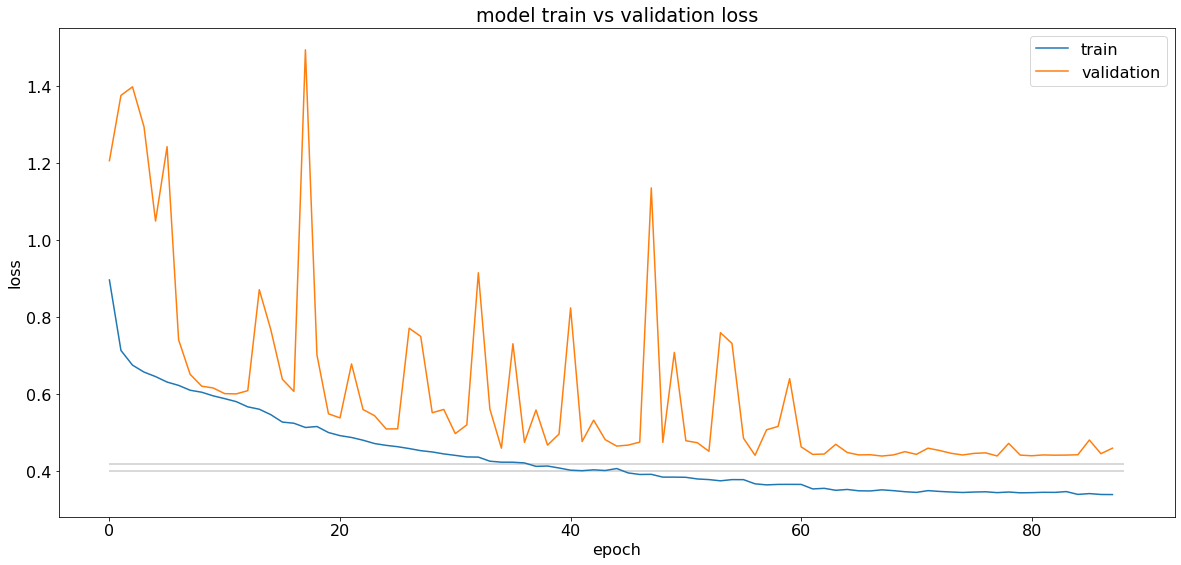

In [ ]:
net.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation, True)

In [ ]:
net.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.606


In [ ]:
net.evaluate_best([X_testpromoter_p, X_testhalflife], y_test, TPU=True)

Test R^2 = 0.606


0.6063882346300286

In [ ]:
# net.plot_train()

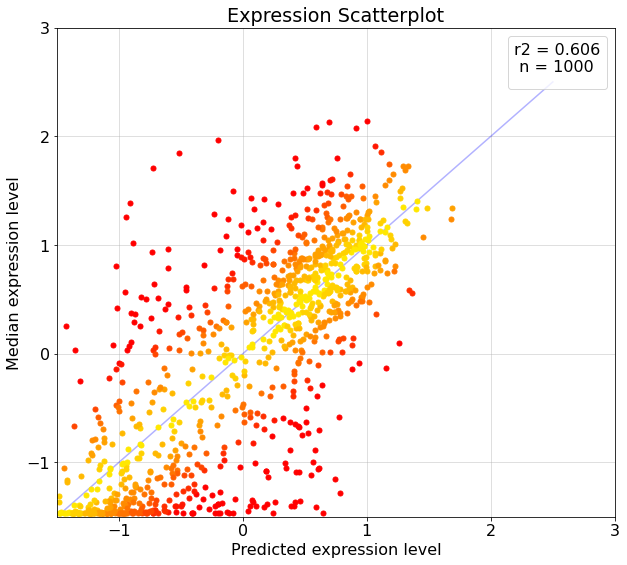

In [ ]:
net.plot_r2([X_testpromoter_p, X_testhalflife], y_test, True)

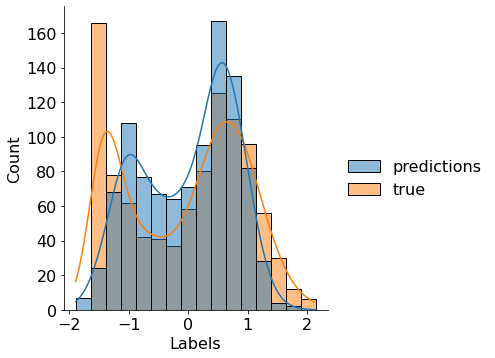

In [ ]:
net.plot_kde([X_testpromoter_p, X_testhalflife], y_test, True)